<h5 style="font-weight: bold; margin-bottom: 5px;">Elbow Method Explanation</h5>
<p style="font-size: 17px; margin-top: 0; margin-bottom: 10px;">The <strong>Elbow Method</strong> is a technique used to determine the optimal number of clusters (k) for K-Means clustering. The goal is to identify the point where adding more clusters does not significantly improve the model, forming an "elbow" shape in the plot.</p>

<h5 style="font-weight: bold; margin-bottom: 5px;">Steps Involved in the Elbow Method:</h5>
<ol style="font-size: 17px; margin-top: 0; margin-bottom: 10px;">
  <li style="margin-bottom: 5px;"><strong>K-Means Clustering:</strong> We apply the K-Means algorithm for different values of k (e.g., from 1 to 10) and calculate the WCSS (Within-Cluster Sum of Squares) for each k.</li>
  <li style="margin-bottom: 5px;"><strong>WCSS (Within-Cluster Sum of Squares):</strong> WCSS measures how compact the clusters are by summing up the squared distances from each point to its assigned centroid. A smaller WCSS means better clustering.</li>
  <li style="margin-bottom: 5px;"><strong>Plot the WCSS:</strong> We plot k (number of clusters) vs. WCSS on a graph. As k increases, WCSS will decrease because more clusters fit the data better.</li>
  <li style="margin-bottom: 5px;"><strong>Find the Elbow:</strong> The "elbow" is the point where the rate of decrease in WCSS slows down. This indicates that adding more clusters doesn’t improve the model much. The k value at this point is the optimal number of clusters.</li>
</ol>

<h5 style="font-weight: bold; margin-bottom: 5px;">Summary:</h5>
<p style="font-size: 17px; margin-top: 0; margin-bottom: 10px;">The Elbow Method helps identify the optimal k by looking for the point where the rate of decrease in WCSS slows down. This point corresponds to the optimal number of clusters that balances model accuracy and complexity.</p>


<h5 style="font-weight: bold; margin-bottom: 5px;">Imports</h5>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

<h5 style="font-weight: bold; margin-bottom: 5px;">Step 1: Generate Synthetic Data</h5>

In [14]:

X, _ = make_blobs(n_samples=300, centers=5, cluster_std=1.5, random_state=42)

<h5 style="font-weight: bold; margin-bottom: 5px;">Step 2: Plot the Data Points</h5>

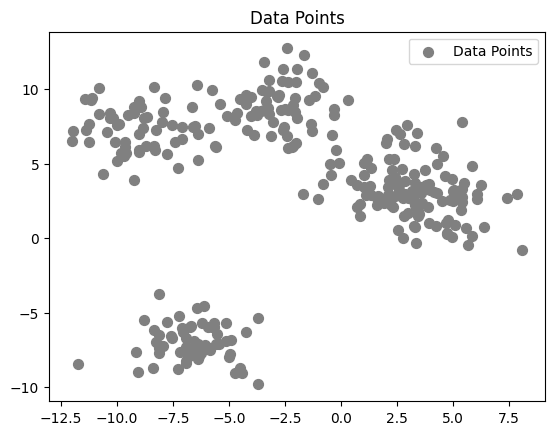

In [15]:
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', marker='o', label='Data Points')
plt.title("Data Points")
plt.legend()
plt.show()

<h6 style="font-weight: bold; margin-bottom: 5px;">Generate Data</h6>
<p style="font-size: 17px; margin-top: 0; margin-bottom: 10px;">We generate synthetic data with 5 centers (clusters) using <strong>make_blobs()</strong>. This data will help us test the K-Means clustering.</p>
<h6 style="font-weight: bold; margin-bottom: 5px;">Plot Data</h6>
<p style="font-size: 17px; margin-top: 0; margin-bottom: 10px;">We plot the generated data points on a scatter plot to visualize the clusters. The scatter plot will display the points with different colors, representing the different clusters.</p>

<h5 style="font-weight: bold; margin-bottom: 5px;">Step 3: Apply the Elbow Method</h5>

In [16]:

wcss = []  # To store WCSS for each k
k_values = range(1, 11)  # Testing k from 1 to 10

# Compute WCSS for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS is stored in `inertia_`

<h6 style="font-weight: bold; margin-bottom: 5px;">Apply K-Means</h6>
<p style="font-size: 17px; margin-top: 0; margin-bottom: 10px;">We run the K-Means algorithm for k values from 1 to 10. For each k, we compute the WCSS (inertia_ is the default name for WCSS in sklearn).</p>

<h6 style="font-weight: bold; margin-bottom: 5px;">Store WCSS</h6>
<p style="font-size: 17px; margin-top: 0; margin-bottom: 10px;">The WCSS values for each k are stored in the list <strong>wcss</strong>. This allows us to analyze the change in WCSS as we vary k, which will help us identify the optimal number of clusters.</p>

<h5 style="font-weight: bold; margin-bottom: 5px;">Step 4: Calculate the Difference and Second Difference to Find the Elbow Point</h5>


In [17]:

diff_wcss = np.diff(wcss)  # First difference (WCSS(k) - WCSS(k-1))
diff_diff_wcss = np.diff(diff_wcss)  # Second difference (change in the first difference)

# Find the index where the second difference is maximized (indicating the elbow)
elbow_k = np.argmax(diff_diff_wcss) + 2  # Add 2 because diff_diff_wcss is one element shorter

<h6 style="font-weight: bold; margin-bottom: 5px;">First Difference</h6>
<p style="font-size: 17px; margin-top: 0; margin-bottom: 10px;">We calculate the difference between consecutive WCSS values. This helps to understand how much the WCSS is changing as we increase k. The first difference shows how the WCSS value changes as the number of clusters increases.</p>

<h6 style="font-weight: bold; margin-bottom: 5px;">Second Difference</h6>
<p style="font-size: 17px; margin-top: 0; margin-bottom: 10px;">We compute the second difference to find where the rate of change in WCSS slows down. The second difference gives us an insight into where the curve flattens, which is important for identifying the elbow.</p>

<h6 style="font-weight: bold; margin-bottom: 5px;">Elbow Point</h6>
<p style="font-size: 17px; margin-top: 0; margin-bottom: 10px;">The <strong>elbow_k</strong> is the point where the second difference is maximized, indicating the "elbow" of the graph. This is the optimal number of clusters where adding more clusters does not significantly improve the model's performance.</p>

<h5 style="font-weight: bold; margin-bottom: 5px;">Step 5: Plot WCSS and Highlight the Elbow</h5>

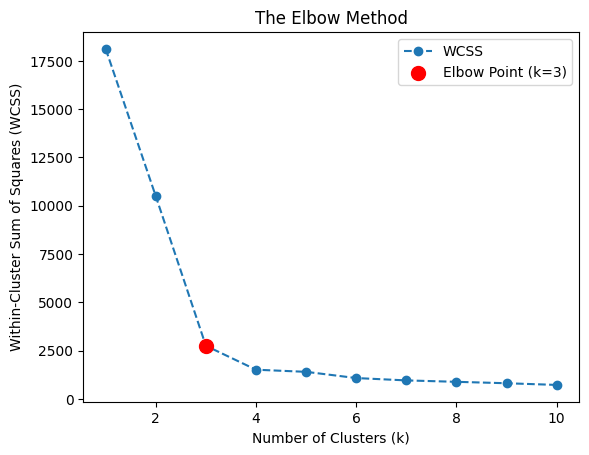

Elbow detected at k = 3


In [18]:
plt.plot(k_values, wcss, marker='o', linestyle='--', label="WCSS")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("The Elbow Method")

# Highlight the elbow point
plt.scatter(elbow_k, wcss[elbow_k - 1], color='red', s=100, zorder=5, label=f"Elbow Point (k={elbow_k})")
plt.legend()
plt.show()

print(f"Elbow detected at k = {elbow_k}")


<h6 style="font-weight: bold; margin-bottom: 5px;">Plot WCSS</h6>
<p style="font-size: 17px; margin-top: 0; margin-bottom: 5px;">We plot the WCSS values against the number of clusters (k). This shows how WCSS decreases as k increases. The WCSS will decrease as the number of clusters increases, but after a certain point, the decrease slows down, indicating the optimal number of clusters.</p>

<h6 style="font-weight: bold; margin-bottom: 5px;">Highlight Elbow</h6>
<p style="font-size: 17px; margin-top: 0; margin-bottom: 5px;">The detected elbow point is marked with a red dot. This is where the curve bends, indicating the optimal number of clusters. The elbow is where adding more clusters does not significantly reduce WCSS.</p>
